In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sidetable
import sidetable as stb
from scipy import stats
import requests
from bs4 import BeautifulSoup
!pip install selenium
from selenium import webdriver

In [8]:
year = []
company = []
model = []
owners = []
price = []
km = []
city = [] 
updated = []  



for i in range(1,22): 
    url = (f"https://www.bikewale.com/used/bikes-in-india/#pn={i}")
    driver = webdriver.Chrome(r"C:\Users\hp\Downloads\chromedriver_win32\chromedriver.exe")
    driver.get(url)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()
    a = soup.find_all("a",class_="text-truncate text-black")
    for i in a:
        text = i.text
        regex = re.findall("(\d+),",text)
        year.append(regex[0])
    
    for i in a:
        text = i.text
        regex = re.findall("\s(\w+)\s.+",text)
        company.append(regex[0])
        
    for i in a:
        text = i.text
        regex = re.findall("\s\w+\w.(\w+\s\w+).+",text)
        if regex:
            model.append(regex[0])
        else:
            model.append(np.nan)
    
    a = soup.find_all("span",class_="font22 text-bold")
    for i in a:
        text = i.text
        price.append(text)
    
    for i in soup.find_all("li",class_="bg-white"):
        text=i.text
        regex=re.findall("(\d+,?\d+)\s\skms",text)
        if regex:
            km.append(regex[0])
        else:
            km.append(np.nan)
        
    for i in soup.find_all("li",class_="bg-white"):
        text=i.text
        regex=re.findall("(\d)\w+\sOw",text)
        if regex:
            owners.append(regex[0])
        else:
            owners.append(np.nan)
        
    for i in soup.find_all("li",class_="bg-white"):
        text=i.text
        regex=re.findall("(\w+)\s\W₹",text)
        if regex:
            city.append(regex[0])
        else:
            city.append(np.nan)
    
    a = soup.find_all("li",class_="bg-white")
    for i in a:
        text=i.text
        regex=re.findall(":\s(\d+\s\w+\s\w+)",text)
        if regex:
            updated.append(regex[0])
        else:
            updated.append(np.nan)

C:\Users\hp\AppData\Local\Temp\ipykernel_10948\985300878.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\hp\Downloads\chromedriver_win32\chromedriver.exe")


In [9]:
print(len(year),len(company),len(model),len(price),len(owners),len(km),len(city),len(updated))

420 420 420 420 420 420 420 420


In [7]:
#updated

In [47]:
#city

In [48]:
#owners

In [49]:
#km

In [50]:
#price

In [51]:
#company

In [52]:
#year

In [48]:
#model

In [10]:
data = {"Company":company, "Model":model, "Year":year, "Owners":owners, "Price":price, "City":city, "Kilometer":km, "Updated dates":updated}

In [11]:
df1 = pd.DataFrame(data)
df1

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,"95,000",Sikar,"16,000",10 March 2023
1,Bajaj,Pulsar 150,2019,1,"65,000",Kolkata,"3,000",10 March 2023
2,Honda,Grazia Standard,2017,1,"48,000",Panchkula,"2,500",10 March 2023
3,Suzuki,Access 125,2018,1,"70,000",Bangalore,"8,000",10 March 2023
4,Yamaha,FZ S,2021,1,"1,10,000",Ajmer,"12,000",10 March 2023
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,"45,000",Cuttack,"23,000",28 February 2023
416,Jawa,42 Version,2021,1,"1,85,000",Chennai,"6,700",28 February 2023
417,Royal,Enfield Bullet,2021,1,"1,40,000",Bargarh,"19,000",28 February 2023
418,Yamaha,YZF R15,2016,1,"75,000",Bangalore,"30,000",28 February 2023


In [12]:
df1.to_csv("bikewale_dataset.csv")

# start from here 

In [2]:
bikewale_1 = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\bikewale_dataset.csv")

In [3]:
bikewale_1

,Unnamed: 0,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,0,Bajaj,Pulsar 220,2018,1,"95,000",Sikar,"16,000",10 March 2023
1,1,Bajaj,Pulsar 150,2019,1,"65,000",Kolkata,"3,000",10 March 2023
2,2,Honda,Grazia Standard,2017,1,"48,000",Panchkula,"2,500",10 March 2023
3,3,Suzuki,Access 125,2018,1,"70,000",Bangalore,"8,000",10 March 2023
4,4,Yamaha,FZ S,2021,1,"1,10,000",Ajmer,"12,000",10 March 2023
...,...,...,...,...,...,...,...,...,...
415,415,Hero,Ignitor Disc,2016,1,"45,000",Cuttack,"23,000",28 February 2023
416,416,Jawa,42 Version,2021,1,"1,85,000",Chennai,"6,700",28 February 2023
417,417,Royal,Enfield Bullet,2021,1,"1,40,000",Bargarh,"19,000",28 February 2023
418,418,Yamaha,YZF R15,2016,1,"75,000",Bangalore,"30,000",28 February 2023


In [4]:
bikewale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     420 non-null    int64 
 1   Company        420 non-null    object
 2   Model          419 non-null    object
 3   Year           420 non-null    int64 
 4   Owners         420 non-null    int64 
 5   Price          420 non-null    object
 6   City           419 non-null    object
 7   Kilometer      420 non-null    object
 8   Updated dates  420 non-null    object
dtypes: int64(3), object(6)
memory usage: 29.7+ KB


In [5]:
bikewale_1.drop(["Unnamed: 0"], axis= 1)

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,"95,000",Sikar,"16,000",10 March 2023
1,Bajaj,Pulsar 150,2019,1,"65,000",Kolkata,"3,000",10 March 2023
2,Honda,Grazia Standard,2017,1,"48,000",Panchkula,"2,500",10 March 2023
3,Suzuki,Access 125,2018,1,"70,000",Bangalore,"8,000",10 March 2023
4,Yamaha,FZ S,2021,1,"1,10,000",Ajmer,"12,000",10 March 2023
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,"45,000",Cuttack,"23,000",28 February 2023
416,Jawa,42 Version,2021,1,"1,85,000",Chennai,"6,700",28 February 2023
417,Royal,Enfield Bullet,2021,1,"1,40,000",Bargarh,"19,000",28 February 2023
418,Yamaha,YZF R15,2016,1,"75,000",Bangalore,"30,000",28 February 2023


# Data Manipulation

In [6]:
bikewale_1.isnull().sum()

Unnamed: 0       0
Company          0
Model            1
Year             0
Owners           0
Price            0
City             1
Kilometer        0
Updated dates    0
dtype: int64

In [7]:
a = bikewale_1[bikewale_1['Model'].isnull()]
a.drop(["Unnamed: 0"], axis = 1)
            

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
13,TVS,NaN,2006,2,"17,000",Dhanbad,"70,000",10 March 2023


In [8]:
bikewale_1['Model'].fillna(bikewale_1['Model'].mode()[0]).iloc[[13]]

13    Apache RTR
Name: Model, dtype: object

In [9]:
bikewale_1['Model'].fillna(bikewale_1['Model'].mode()[0], inplace = True)
bikewale_1['Model'].isnull().sum()

0

In [10]:
a = bikewale_1[bikewale_1['City'].isnull()]
a.drop(["Unnamed: 0"], axis = 1)
            

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
254,Hero,Honda Splendor,2005,1,"21,000",NaN,"60,000",06 March 2023


In [11]:
bikewale_1['City'].fillna(bikewale_1['City'].mode()[0]).iloc[[254]]

254    Delhi
Name: City, dtype: object

In [12]:
bikewale_1['City'].fillna(bikewale_1['City'].mode()[0], inplace = True)
bikewale_1['City'].isnull().sum()

0

In [13]:
bikewale = bikewale_1.fillna(bikewale_1.groupby(['Model']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [14]:
bikewale = bikewale_1.fillna(bikewale_1.groupby(['City']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [15]:
bikewale.isnull().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Owners           0
Price            0
City             0
Kilometer        0
Updated dates    0
dtype: int64

In [16]:
bikewale

,Unnamed: 0,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,0,Bajaj,Pulsar 220,2018,1,"95,000",Sikar,"16,000",10 March 2023
1,1,Bajaj,Pulsar 150,2019,1,"65,000",Kolkata,"3,000",10 March 2023
2,2,Honda,Grazia Standard,2017,1,"48,000",Panchkula,"2,500",10 March 2023
3,3,Suzuki,Access 125,2018,1,"70,000",Bangalore,"8,000",10 March 2023
4,4,Yamaha,FZ S,2021,1,"1,10,000",Ajmer,"12,000",10 March 2023
...,...,...,...,...,...,...,...,...,...
415,415,Hero,Ignitor Disc,2016,1,"45,000",Cuttack,"23,000",28 February 2023
416,416,Jawa,42 Version,2021,1,"1,85,000",Chennai,"6,700",28 February 2023
417,417,Royal,Enfield Bullet,2021,1,"1,40,000",Bargarh,"19,000",28 February 2023
418,418,Yamaha,YZF R15,2016,1,"75,000",Bangalore,"30,000",28 February 2023


In [17]:
bikewale.drop(["Unnamed: 0"],axis = 1)

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,"95,000",Sikar,"16,000",10 March 2023
1,Bajaj,Pulsar 150,2019,1,"65,000",Kolkata,"3,000",10 March 2023
2,Honda,Grazia Standard,2017,1,"48,000",Panchkula,"2,500",10 March 2023
3,Suzuki,Access 125,2018,1,"70,000",Bangalore,"8,000",10 March 2023
4,Yamaha,FZ S,2021,1,"1,10,000",Ajmer,"12,000",10 March 2023
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,"45,000",Cuttack,"23,000",28 February 2023
416,Jawa,42 Version,2021,1,"1,85,000",Chennai,"6,700",28 February 2023
417,Royal,Enfield Bullet,2021,1,"1,40,000",Bargarh,"19,000",28 February 2023
418,Yamaha,YZF R15,2016,1,"75,000",Bangalore,"30,000",28 February 2023


# data cleaning

In [18]:
bikewale["Price"] = bikewale["Price"].str.replace("[,]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_7032\448799525.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bikewale["Price"] = bikewale["Price"].str.replace("[,]",'')


In [19]:
bikewale["Kilometer"] = bikewale["Kilometer"].str.replace("[,]",'')

C:\Users\hp\AppData\Local\Temp\ipykernel_7032\4106930240.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bikewale["Kilometer"] = bikewale["Kilometer"].str.replace("[,]",'')


In [20]:
bikewale.drop(["Unnamed: 0"],axis = 1)

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,95000,Sikar,16000,10 March 2023
1,Bajaj,Pulsar 150,2019,1,65000,Kolkata,3000,10 March 2023
2,Honda,Grazia Standard,2017,1,48000,Panchkula,2500,10 March 2023
3,Suzuki,Access 125,2018,1,70000,Bangalore,8000,10 March 2023
4,Yamaha,FZ S,2021,1,110000,Ajmer,12000,10 March 2023
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,45000,Cuttack,23000,28 February 2023
416,Jawa,42 Version,2021,1,185000,Chennai,6700,28 February 2023
417,Royal,Enfield Bullet,2021,1,140000,Bargarh,19000,28 February 2023
418,Yamaha,YZF R15,2016,1,75000,Bangalore,30000,28 February 2023


In [21]:
bikewale.isnull().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Owners           0
Price            0
City             0
Kilometer        0
Updated dates    0
dtype: int64

In [22]:
bikewale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     420 non-null    int64 
 1   Company        420 non-null    object
 2   Model          420 non-null    object
 3   Year           420 non-null    int64 
 4   Owners         420 non-null    int64 
 5   Price          420 non-null    object
 6   City           420 non-null    object
 7   Kilometer      420 non-null    object
 8   Updated dates  420 non-null    object
dtypes: int64(3), object(6)
memory usage: 29.7+ KB


In [23]:
bikewale[["Kilometer"]]=bikewale[["Kilometer"]].astype(int)
bikewale[["Price"]]=bikewale[["Price"]].astype(int)

In [24]:
bikewale[["Updated dates"]]=bikewale[["Updated dates"]].apply(pd.to_datetime)

In [25]:
bikewale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     420 non-null    int64         
 1   Company        420 non-null    object        
 2   Model          420 non-null    object        
 3   Year           420 non-null    int64         
 4   Owners         420 non-null    int64         
 5   Price          420 non-null    int32         
 6   City           420 non-null    object        
 7   Kilometer      420 non-null    int32         
 8   Updated dates  420 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(3), object(3)
memory usage: 26.4+ KB


# Outliers

In [26]:
bikewale.shape

(420, 9)

<AxesSubplot:xlabel='Kilometer'>

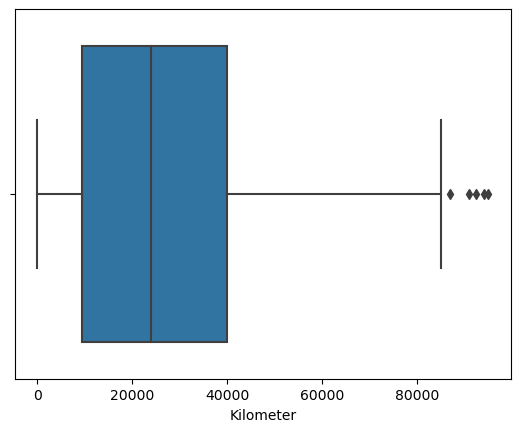

In [27]:
# box plot for Kilometer
sns.boxplot(data = bikewale, x = bikewale["Kilometer"])

In [28]:
Q1 = bikewale["Kilometer"].quantile(0.25)
Q3 = bikewale["Kilometer"].quantile(0.75)

IQR =Q3-Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR
print(Q1,"------",Q3,"-----",IQR,end="\n")
print(lower_whisker,"-----",upper_whisker)

9449.75 ------ 40000.0 ----- 30550.25
-36375.625 ----- 85825.375


In [29]:
bikewale = bikewale[bikewale["Kilometer"]< upper_whisker]


In [30]:
bikewale

,Unnamed: 0,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,0,Bajaj,Pulsar 220,2018,1,95000,Sikar,16000,2023-03-10
1,1,Bajaj,Pulsar 150,2019,1,65000,Kolkata,3000,2023-03-10
2,2,Honda,Grazia Standard,2017,1,48000,Panchkula,2500,2023-03-10
3,3,Suzuki,Access 125,2018,1,70000,Bangalore,8000,2023-03-10
4,4,Yamaha,FZ S,2021,1,110000,Ajmer,12000,2023-03-10
...,...,...,...,...,...,...,...,...,...
415,415,Hero,Ignitor Disc,2016,1,45000,Cuttack,23000,2023-02-28
416,416,Jawa,42 Version,2021,1,185000,Chennai,6700,2023-02-28
417,417,Royal,Enfield Bullet,2021,1,140000,Bargarh,19000,2023-02-28
418,418,Yamaha,YZF R15,2016,1,75000,Bangalore,30000,2023-02-28


<AxesSubplot:xlabel='Kilometer'>

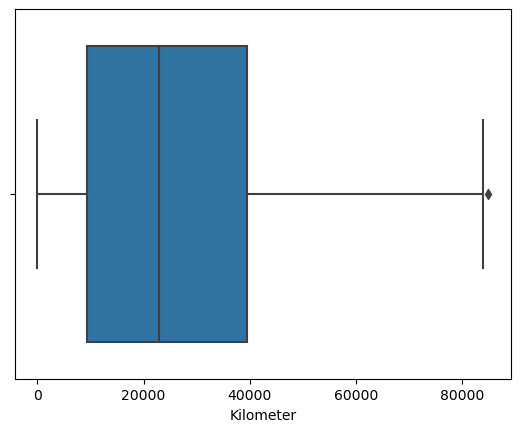

In [31]:
sns.boxplot(data = bikewale, x = bikewale["Kilometer"])

<AxesSubplot:xlabel='Price'>

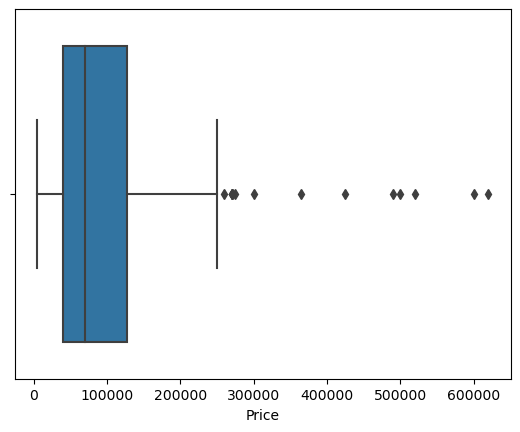

In [32]:
# box plot for price
sns.boxplot(data = bikewale, x = bikewale["Price"])

In [33]:
Q1 = bikewale["Price"].quantile(0.25)
Q3 = bikewale["Price"].quantile(0.75)

IQR =Q3-Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR
print(Q1,"------",Q3,"-----",IQR,end="\n")
print(lower_whisker,"-----",upper_whisker)

40000.0 ------ 127500.0 ----- 87500.0
-91250.0 ----- 258750.0


In [34]:
bikewale = bikewale[bikewale["Price"]< upper_whisker]


<AxesSubplot:xlabel='Price'>

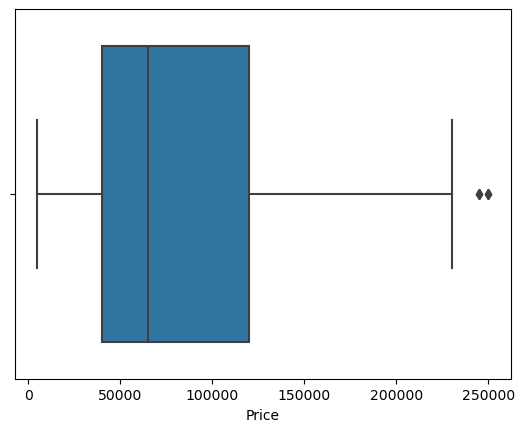

In [36]:
sns.boxplot(data = bikewale, x = bikewale["Price"])

In [37]:
bikewale.drop(["Unnamed: 0"], axis = 1, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7032\3405940406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikewale.drop(["Unnamed: 0"], axis = 1, inplace = True)


In [61]:
bikewale

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,95000,Sikar,16000,2023-03-10
1,Bajaj,Pulsar 150,2019,1,65000,Kolkata,3000,2023-03-10
2,Honda,Grazia Standard,2017,1,48000,Panchkula,2500,2023-03-10
3,Suzuki,Access 125,2018,1,70000,Bangalore,8000,2023-03-10
4,Yamaha,FZ S,2021,1,110000,Ajmer,12000,2023-03-10
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,45000,Cuttack,23000,2023-02-28
416,Jawa,42 Version,2021,1,185000,Chennai,6700,2023-02-28
417,Royal,Enfield Bullet,2021,1,140000,Bargarh,19000,2023-02-28
418,Yamaha,YZF R15,2016,1,75000,Bangalore,30000,2023-02-28


In [62]:
bikewale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        401 non-null    object        
 1   Model          401 non-null    object        
 2   Year           401 non-null    int64         
 3   Owners         401 non-null    int64         
 4   Price          401 non-null    int32         
 5   City           401 non-null    object        
 6   Kilometer      401 non-null    int32         
 7   Updated dates  401 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 41.2+ KB


In [69]:
bikewale.describe(include = "int64").T

,count,mean,std,min,25%,50%,75%,max
Year,401.0,2016.815461,4.425592,1998.0,2014.0,2018.0,2020.0,2023.0
Owners,401.0,1.157107,0.455802,1.0,1.0,1.0,1.0,5.0


In [70]:
bikewale.describe(include = ["object", "datetime64[ns]"]).T

C:\Users\hp\AppData\Local\Temp\ipykernel_7032\3739233070.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikewale.describe(include = ["object", "datetime64[ns]"]).T


,count,unique,top,freq,first,last
Company,401,20,Honda,69,NaT,NaT
Model,401,144,Apache RTR,19,NaT,NaT
City,401,140,Delhi,42,NaT,NaT
Updated dates,401,10,2023-03-09 00:00:00,145,2023-02-28,2023-03-10


In [67]:
bikewale.describe(include = "int32").T

,count,mean,std,min,25%,50%,75%,max
Price,401.0,85280.296758,59062.652347,5000.0,40000.0,65000.0,120000.0,250000.0
Kilometer,401.0,27412.216958,20169.026648,0.0,10000.0,25000.0,40000.0,85000.0


# Univariant analysis

In [38]:
bikewale.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,401.0,2016.815461,4.425592,1998.0,2014.0,2018.0,2020.0,2023.0
Owners,401.0,1.157107,0.455802,1.0,1.0,1.0,1.0,5.0
Price,401.0,85280.296758,59062.652347,5000.0,40000.0,65000.0,120000.0,250000.0
Kilometer,401.0,27412.216958,20169.026648,0.0,10000.0,25000.0,40000.0,85000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

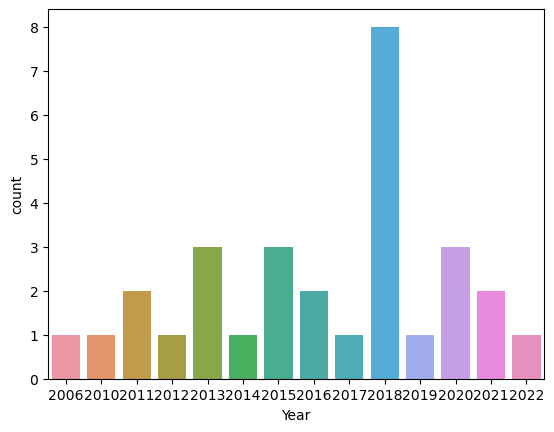

In [39]:
# numerical data
# discrete data
# 2018 model bikes were purchased high when compare to other model.

sns.countplot(bikewale["Year"][:30])

<AxesSubplot:xlabel='Price', ylabel='Count'>

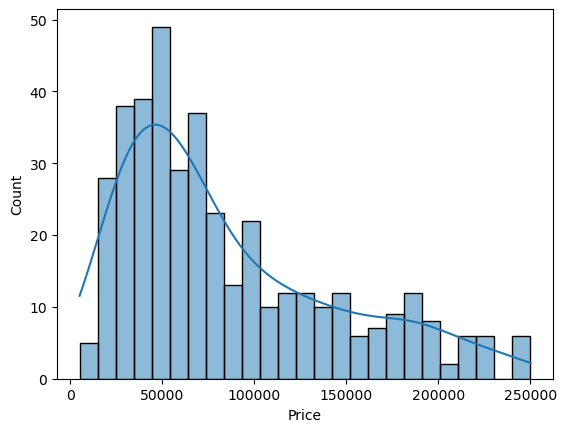

In [40]:
# Numerical data
# Continuos data 
# Count is more for 50,000 price when compare to other prices 

sns.histplot(bikewale["Price"], kde = True, bins = 25)

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

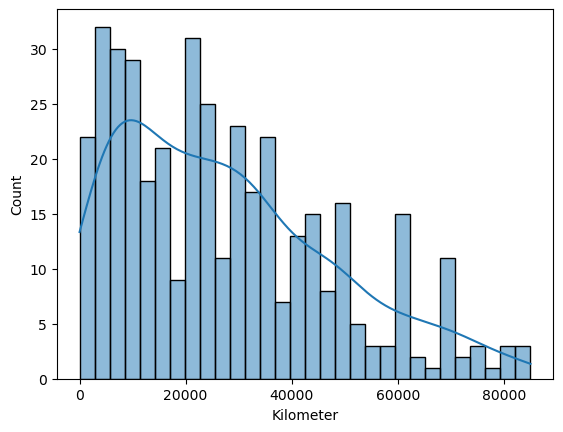

In [41]:
# Numerical data
# continuous data
# 5000kilometer bikes were purchased highly rather than other bikes


sns.histplot(bikewale["Kilometer"], kde = True, bins = 30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owners', ylabel='count'>

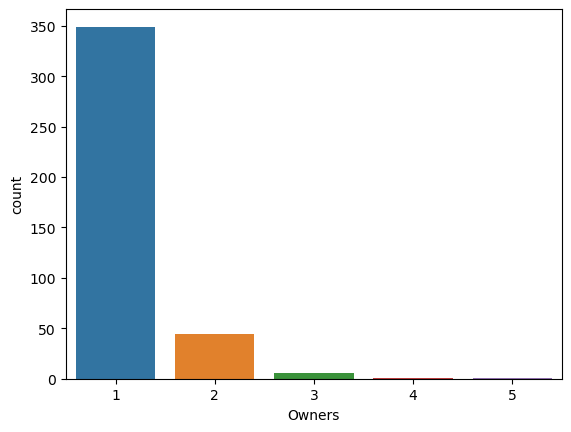

In [42]:
# numerical data
# discrete data
# No.of.owners 1 is purchased high

sns.countplot(bikewale["Owners"])

AxesSubplot(0.125,0.11;0.775x0.77)


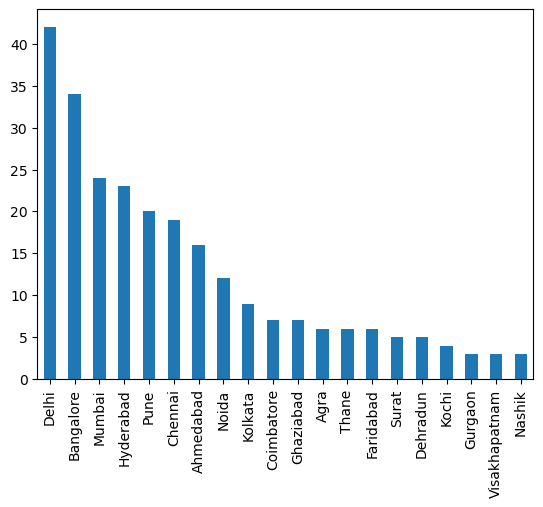

In [43]:
# Categorical data
# in Delhi used bikes were purchased are higher than to other cities in india

print(bikewale["City"].value_counts()[:20].plot(kind = "bar"))

<AxesSubplot:xlabel='count', ylabel='Company'>

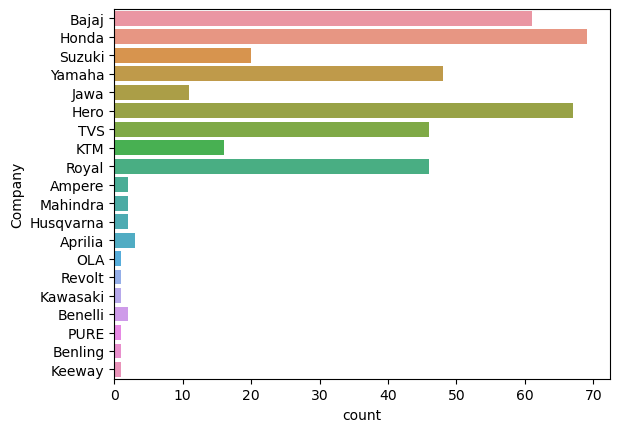

In [44]:
# Categorical data
# Honda used bikes were purchased highly when compare to other bikes

sns.countplot(y = bikewale["Company"])

<AxesSubplot:ylabel='Model'>

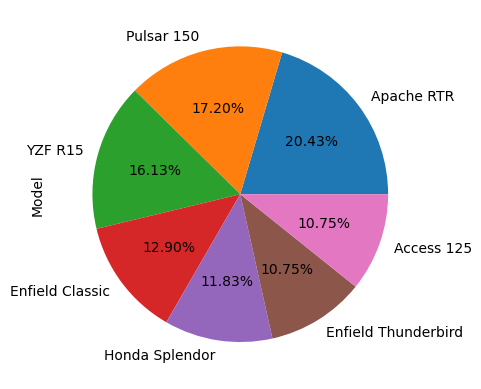

In [45]:
# Categorical data
# Apache RTR purchased more when compare to other company model bikes

bikewale["Model"].value_counts()[:7].plot(kind = "pie", autopct = "%0.02f%%")

# Bivariant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

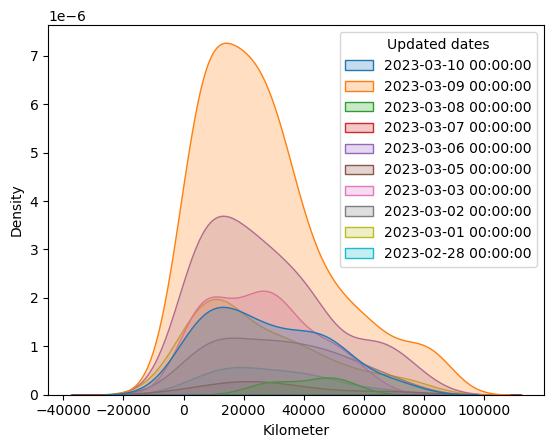

In [46]:
# One datetime data of discrete and one numerical of continuous data
# on 2023-03-09 used bikes were purchased higher than remianing bikes

sns.kdeplot(data = bikewale, x = "Kilometer", shade = True, hue = "Updated dates")

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

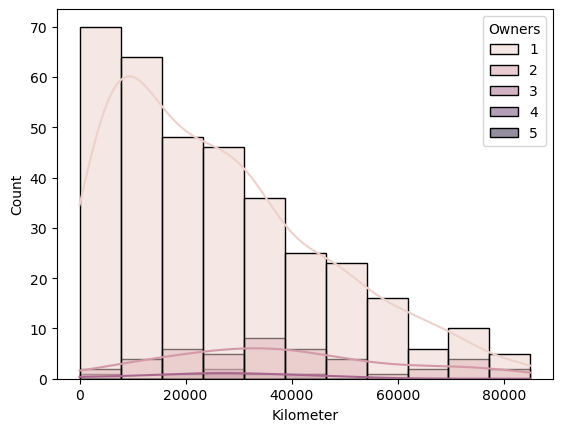

In [47]:
# One categorical and one numerical of continuous data
# 2nd hand bikes were purchased more and travelled at a kilometer of 7000km  

sns.histplot(data = bikewale, x = bikewale["Kilometer"],kde = True, hue = bikewale["Owners"])

<AxesSubplot:xlabel='Price', ylabel='Count'>

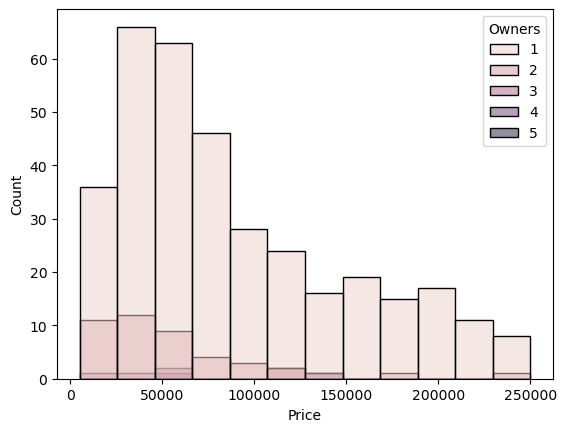

In [48]:
# One categorical and one numerical of continuous data
# 2nd hand bikes and having kilometer at 40k was purchased more

sns.histplot(data = bikewale, x = bikewale["Price"],hue = bikewale["Owners"])

<AxesSubplot:xlabel='Year', ylabel='Price'>

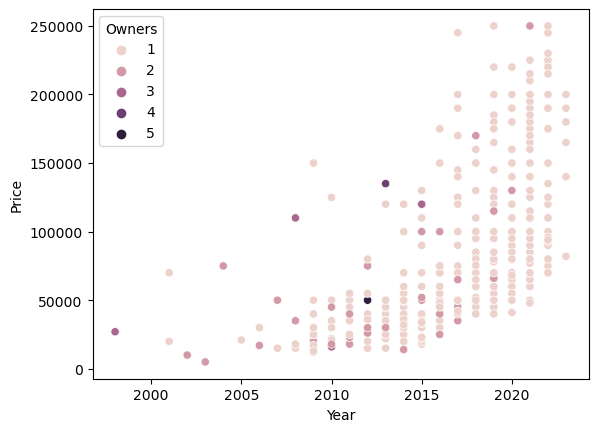

In [49]:
# one categorical data and one numerical data with continuous and another numerical data of discrete data
# above 2020 year and price in between of 50k to 2lak used bikes were purchased highly

sns.scatterplot(x = bikewale["Year"], y = bikewale["Price"], hue = bikewale["Owners"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

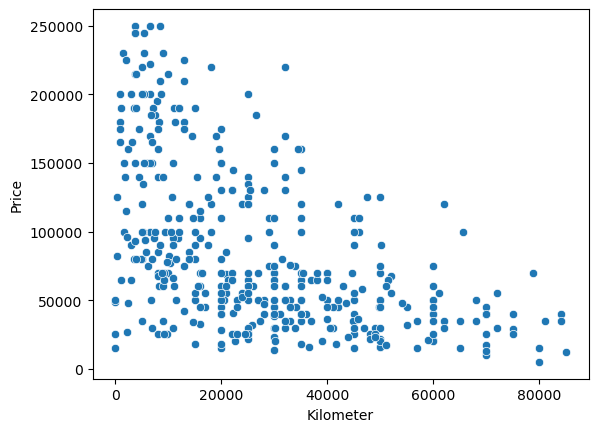

In [50]:
# Two numerical data of continuous data
# Between 20k to 40k kilometer bikes and price of 25k to 75k had purchased highly, when compare to others.

sns.scatterplot(bikewale["Kilometer"], bikewale["Price"])  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

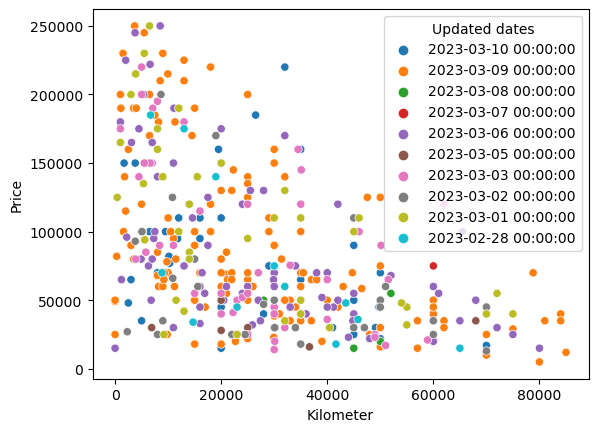

In [51]:
# Two numerical data of continuous data and another numerical data of discrete data
# Kilometer in between 20k to 40k bikes and price at 50k used bikes were purchased highly.

sns.scatterplot(bikewale["Kilometer"], bikewale["Price"], hue = bikewale["Updated dates"])  

<AxesSubplot:xlabel='Price', ylabel='Kilometer'>

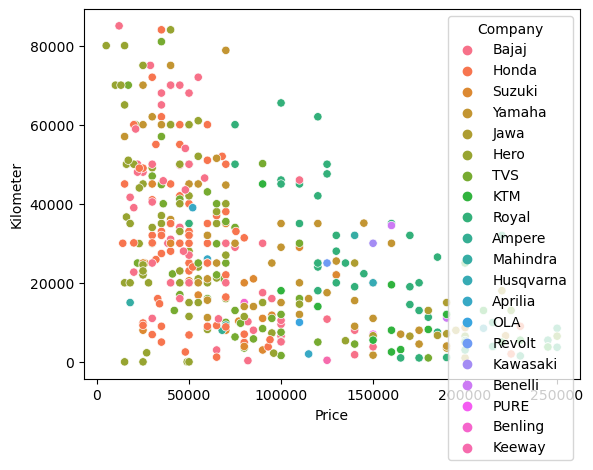

In [52]:
# Two numerical data of continuous data and one categorical data 
# bikes at price of 20k to 40k and with 30k to 60k kilometers are highly purchased  
# purchased Bajaj bikes highly

sns.scatterplot(y = bikewale["Kilometer"], x = bikewale["Price"], hue = bikewale["Company"])  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

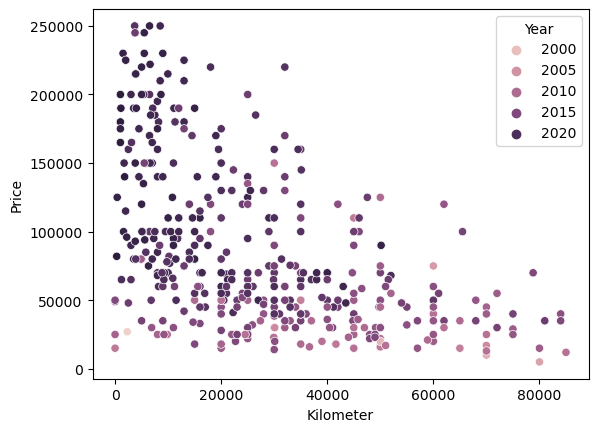

In [53]:
# Two numerical data of continuous data and one numerical data with discrete data
# kilometers at 10k to 15k bikes and price at 60k to 1lak were purchased highly when compare to other bikes.
# 2020 model bikes were highly purchased


sns.scatterplot(bikewale["Kilometer"], bikewale["Price"], hue = bikewale["Year"])

<AxesSubplot:xlabel='Price', ylabel='Updated dates'>

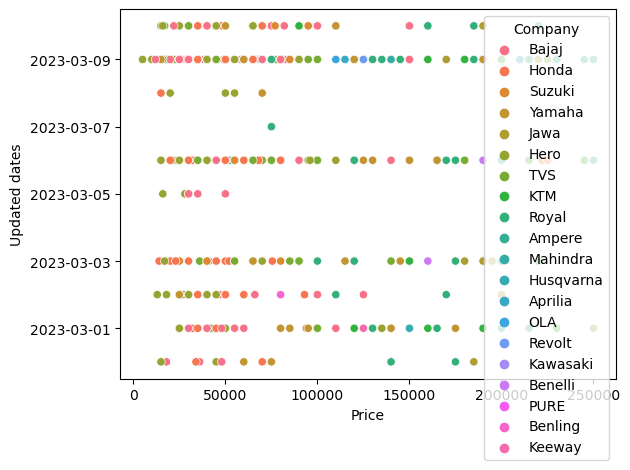

In [54]:
# Two numerical data and one categorical data
# Many of the bajaj bikes were purchased at price 20k to 90k on 2023-03-09

sns.scatterplot(x = bikewale["Price"], y = bikewale["Updated dates"], hue =bikewale["Company"])

# Multivariant Analysis

In [55]:
bikewale

,Company,Model,Year,Owners,Price,City,Kilometer,Updated dates
0,Bajaj,Pulsar 220,2018,1,95000,Sikar,16000,2023-03-10
1,Bajaj,Pulsar 150,2019,1,65000,Kolkata,3000,2023-03-10
2,Honda,Grazia Standard,2017,1,48000,Panchkula,2500,2023-03-10
3,Suzuki,Access 125,2018,1,70000,Bangalore,8000,2023-03-10
4,Yamaha,FZ S,2021,1,110000,Ajmer,12000,2023-03-10
...,...,...,...,...,...,...,...,...
415,Hero,Ignitor Disc,2016,1,45000,Cuttack,23000,2023-02-28
416,Jawa,42 Version,2021,1,185000,Chennai,6700,2023-02-28
417,Royal,Enfield Bullet,2021,1,140000,Bargarh,19000,2023-02-28
418,Yamaha,YZF R15,2016,1,75000,Bangalore,30000,2023-02-28


In [56]:
bikewale.corr()

,Year,Owners,Price,Kilometer
Year,1.000000,-0.285513,0.598031,-0.556178
Owners,-0.285513,1.000000,-0.134167,0.139715
Price,0.598031,-0.134167,1.000000,-0.528856
Kilometer,-0.556178,0.139715,-0.528856,1.000000


<AxesSubplot:>

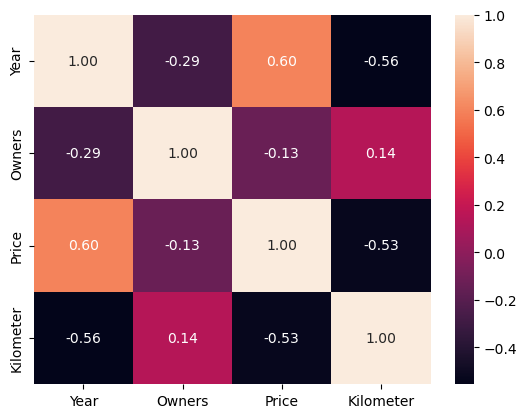

In [57]:
# 









sns.heatmap(bikewale.corr(),
            annot = True,
            fmt = ".2f")

# Pairplot

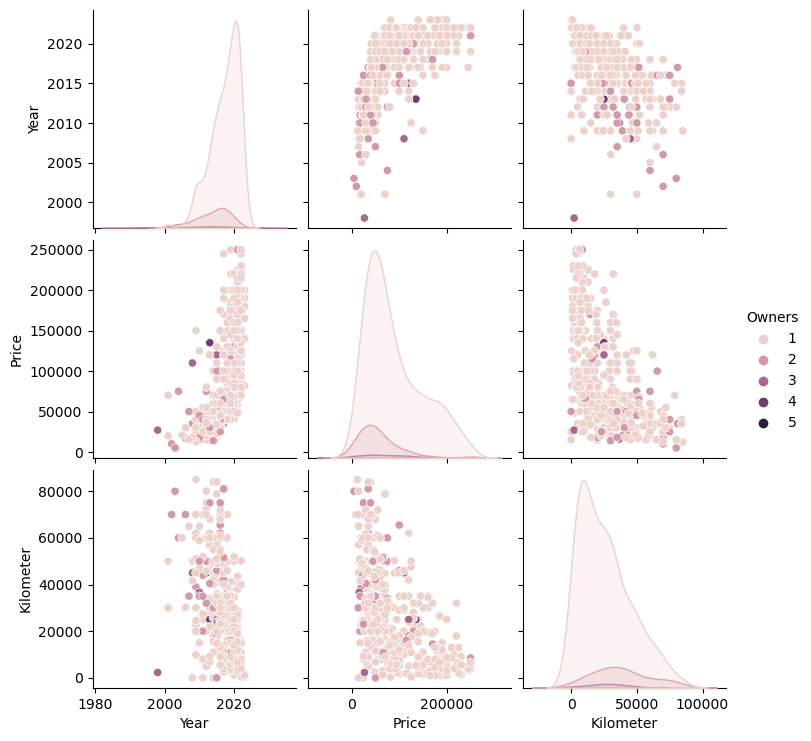

In [58]:
sns.pairplot(bikewale, hue = "Owners")

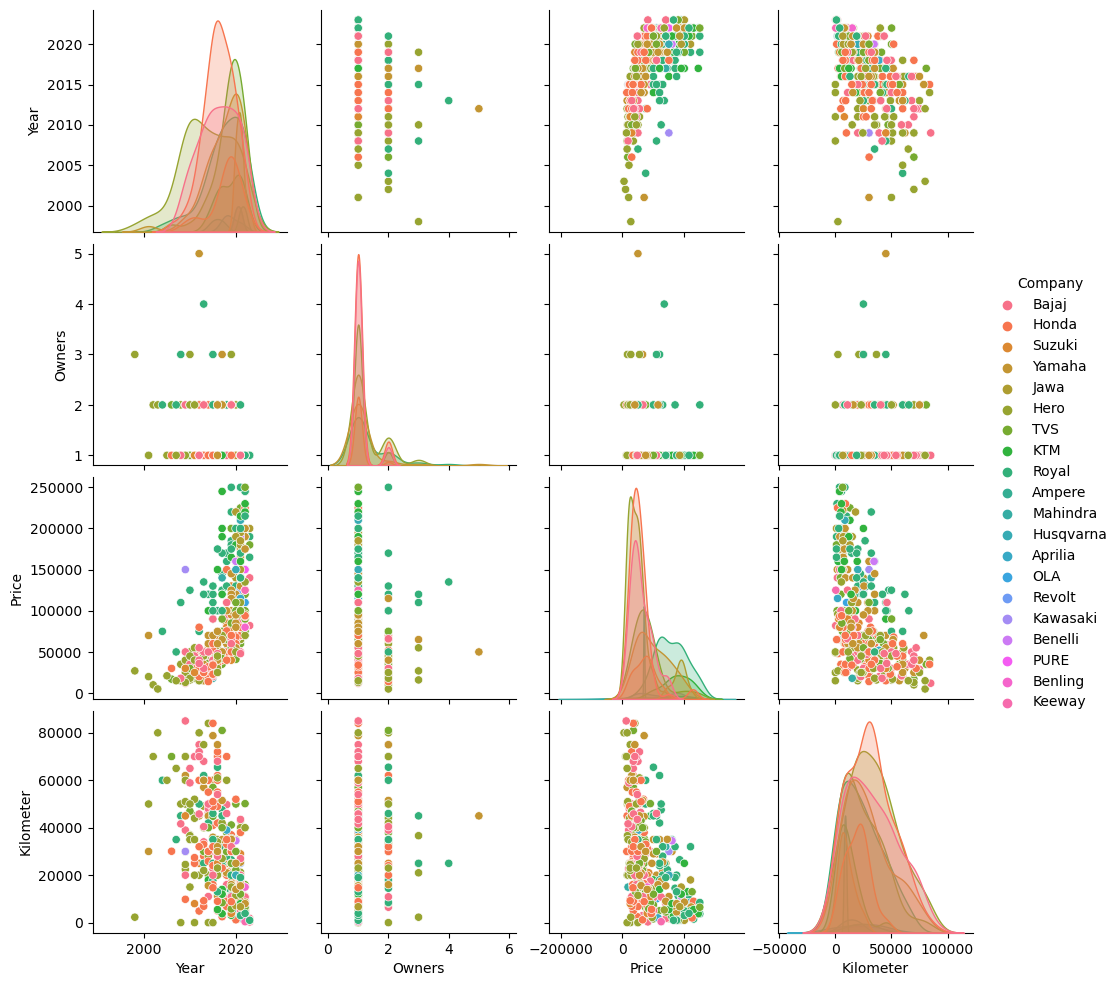

In [59]:
sns.pairplot(bikewale, hue = "Company")

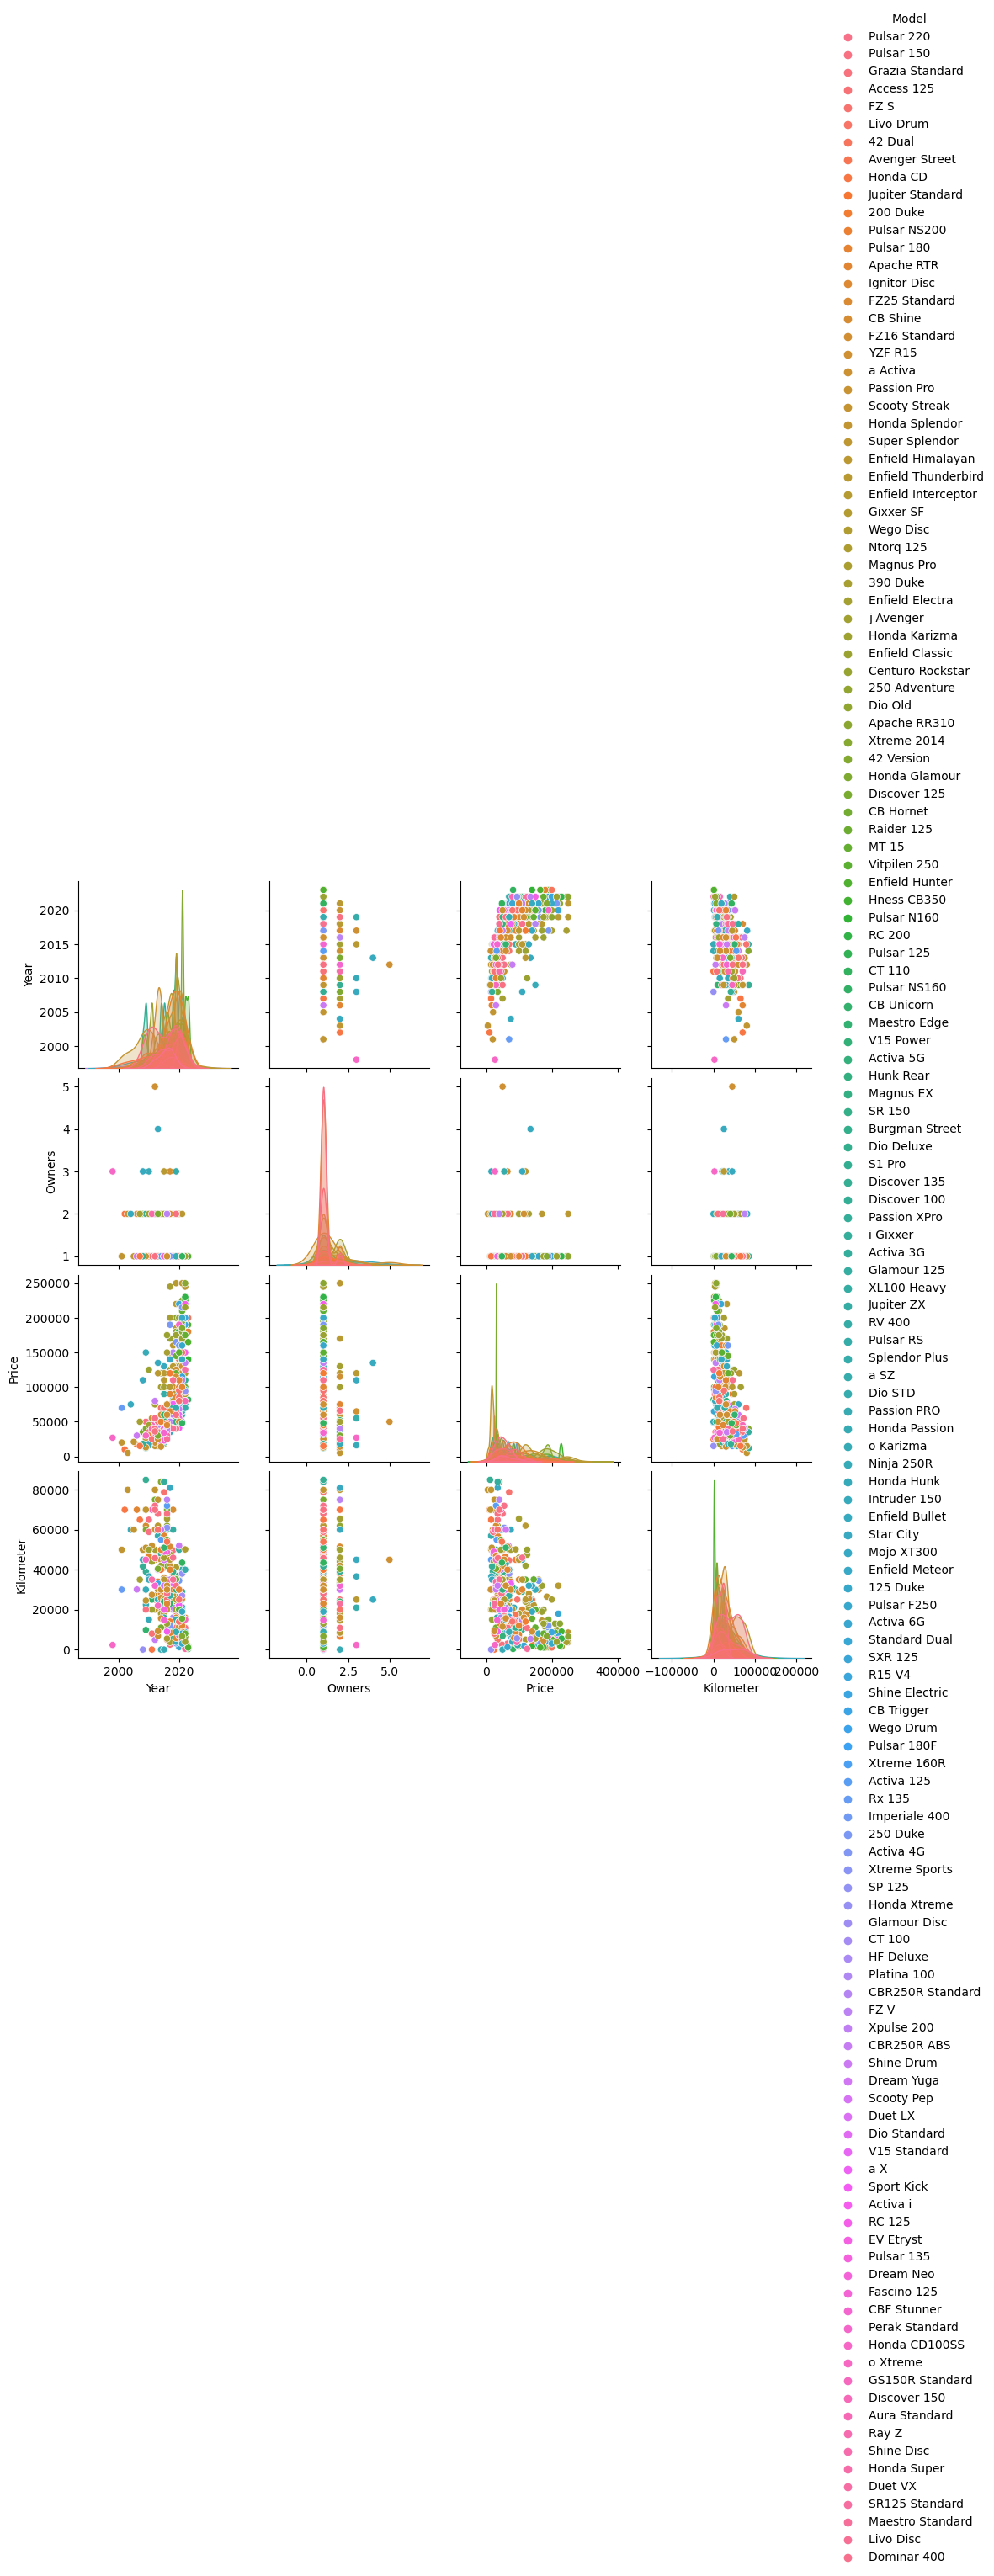

In [60]:
sns.pairplot(bikewale, hue = "Model")